## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

## News Mood

A python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, New York times and W Post__.



The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Included analysis:

* Pull last 100 tweets from each outlet.
* Sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* A DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* DataFrame into a CSV file.
* PNG images for each plot.

In [39]:
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [40]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [63]:
#list of the news outlet - on Tweeter 
#targets
news_outlets=['BBC', 'CBS', 'CNN', 'FoxNews' , 'nytimes', 'washingtonpost']


In [64]:
#Initiating and empty table to hold data from twitter   
cols=['Tweets', 'Followers', 'Following', 'Favorites Count']
popular_news= pd.DataFrame(index=news_outlets ,columns=cols).reset_index()
popular_news=popular_news.rename(columns = {'index':'Screen Name'})

In [65]:
# Iterate through DataFrame
for index, row in popular_news.iterrows():
    try:
        # Grab the username
        target_user = row["Screen Name"]
        # print(target_user)

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_news.set_value(index, "Real Name", user_real_name)
        popular_news.set_value(index, "Tweets", user_tweets)
        popular_news.set_value(index, "Followers", user_followers)
        popular_news.set_value(index, "Following", user_following)
        popular_news.set_value(index, "Favorites Count", user_favorites)

    except tweepy.TweepError as e:
        print(e)
        
#set index with Real Name for nice ploting 
popular_news.set_index('Real Name', inplace=True)
popular_news

,Screen Name,Tweets,Followers,Following,Favorites Count
Real Name,,,,,
BBC,BBC,19945,1132012,159,3595
CBS,CBS,15955,946356,489,1682
CNN,CNN,159496,38581402,1115,1476
Fox News,FoxNews,344983,16513423,405,0
The New York Times,nytimes,300686,40313044,883,15864
Washington Post,washingtonpost,248489,11608776,1455,4564


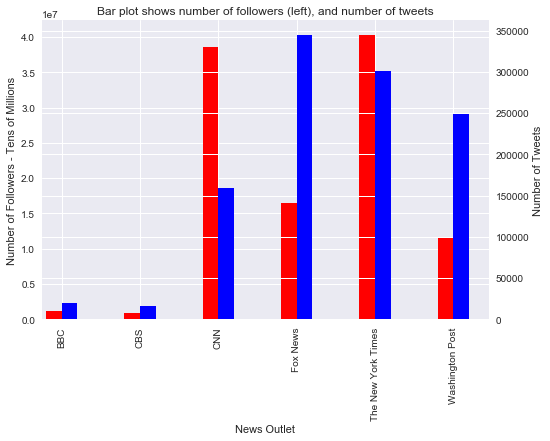

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

popular_news['Followers'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
popular_news['Tweets'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Followers - Tens of Millions')
ax2.set_ylabel('Number of Tweets')
ax.set_xlabel('News Outlet')

plt.title('Bar plot shows number of followers (left), and number of tweets')

plt.show()

In [97]:
# Target User
news_outlets =('BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'washingtonpost' ) 

#Create Dir to hold extracted data 
sentement_scores={}



for news_outlet in news_outlets:

    # Place holders 
    date_time=[]
    tweet_texts =[]
    compounds=   [] 
    neg_score=   []
    pos_score=   []
    neu_score=   []
    tweet_num=   []

    # Create a loop to iteratively run API requests
    num=1
    for tweet_page in range(5):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(news_outlet, page=tweet_page)

        # Loop through all tweets
        for tweet in public_tweets:
            

            # tweet Number 
            tweet_num.append(num)
            num+=1
            # Print Tweet
            #print(tweet["text"])
            
            #extract date 
            date_time.append(tweet['created_at'])

            # Store Tweet in Array
            tweet_texts.append(tweet["text"])
            # store veda in array 
            compound=analyzer.polarity_scores(tweet["text"])['compound']
            #print(compound)
            compounds.append(compound)
            
            neg=analyzer.polarity_scores(tweet["text"])['neg']
            neg_score.append(neg)
            if neg > .4:
                print(tweet["text"])
                print(news_outlet)
                print(f'Negative News Score (0 to 1) : {neg}')
                print('__')
                

            
            pos=analyzer.polarity_scores(tweet["text"])['pos']
            pos_score.append(pos)
            
            if pos > .4:
                print(tweet["text"])
                print(news_outlet)
                print(f'Positive News Score (0 to 1): {pos}')
                print('__')
            
            neu=analyzer.polarity_scores(tweet["text"])['neu']
            neu_score.append(neu)
    
    #Dirctory with all data for the current news outlet 
    sentement_scores[news_outlet]=(tweet_num, date_time, compounds, neg_score, pos_score, neu_score, tweet_texts)

Why I want my best friend and me to get couples therapy. 👭 💬 https://t.co/2zCKRy25Wk https://t.co/PvZrlYo86Y
BBC
Positive News Score (0 to 1): 0.465
__
Why I want my best friend and me to get couples therapy. 👭 💬 https://t.co/2zCKRy25Wk https://t.co/PvZrlYo86Y
BBC
Positive News Score (0 to 1): 0.465
__
RT @bbcpress: 🎁 A special Christmas gift from @BBCiPlayer. Boxsets of drama, natural history, comedy, family favourites, #EastEnders specia…
BBC
Positive News Score (0 to 1): 0.449
__
Withering wit and words of wisdom: Oscar Wilde's best quotes. 📖 https://t.co/mmkVPb0GGt https://t.co/XERUQWYw6E
BBC
Positive News Score (0 to 1): 0.432
__
RT @BBCWthrWatchers: Happy Tuesday!😊 https://t.co/oPgNkuTPpv
BBC
Positive News Score (0 to 1): 0.499
__
RT @vannalovescats: Another successful show. I’m so proud of all of the beautiful ladies, they all did amazing. The musical guests were FAN…
CBS
Positive News Score (0 to 1): 0.449
__
RT @JustHedyJ: All these ladies are so beautiful I love them all. #VS

In [98]:
# a function to to make data frame for each news outlet data 

def pol_df(news_outlet):
    scores={'Tweet_number': sentement_scores[news_outlet][0],
            'Date':sentement_scores[news_outlet][1],
            'compound':sentement_scores[news_outlet][2],
            'Negative':sentement_scores[news_outlet][3],
            'Positive':sentement_scores[news_outlet][4],
            'Neutral':sentement_scores[news_outlet][5],
            'Tweet':sentement_scores[news_outlet][6],
            'News_outlet': news_outlet
           }
    return(pd.DataFrame(scores)) 

In [99]:
# create empty data frame 
cols=['News_outlet', 'Tweet_number', 'Date', 'Positive',  'Negative', 'Neutral', 'compound', 'Tweet']
news_outlets_sentements = pd.DataFrame(columns=cols)

In [100]:
for news_outlet in news_outlets:
    news_outlet_data=pol_df(news_outlet)
    news_outlets_sentements = news_outlets_sentements.append(news_outlet_data)

In [101]:
news_outlets_sentements.reset_index(drop=True, inplace=True)

In [102]:
raw_date=news_outlets_sentements['Date'].tolist()
dates=[datetime.strptime(raw_stamp, "%a %b %d %H:%M:%S %z %Y") for raw_stamp in raw_date]
dates_array=np.asarray(dates)
#pd.Series(test3)
news_outlets_sentements.insert(0, 'Date_time', dates_array)


#drop old raw date 
news_outlets_sentements.drop('Date', axis=1, inplace=True)

In [103]:
news_outlets_sentements.head() # check data - should have all the outles . head  

,Date_time,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number,compound
0,2017-11-29 17:05:05+00:00,0.103,0.774,BBC,0.123,When @McInTweet is in disguise and you get a b...,1,0.1007
1,2017-11-29 16:33:12+00:00,0.000,0.870,BBC,0.130,"📺🎄🎁 Call The Midwife, Mary Berry's Christmas P...",2,0.4574
2,2017-11-29 16:09:40+00:00,0.000,1.000,BBC,0.000,RT @BBCWthrWatchers: Will we have a white Chri...,3,0.0000
3,2017-11-29 14:00:11+00:00,0.231,0.769,BBC,0.000,‘Gateway to hell’ — the treacherous strait of ...,4,-0.6705
4,2017-11-29 13:39:49+00:00,0.000,1.000,BBC,0.000,RT @bbccomedy: What do Princes William and Har...,5,0.0000


In [104]:
news_outlets_sentements.tail() # check data - should have all the outles . tail for last news outlet  

,Date_time,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number,compound
595,2017-11-29 03:03:57+00:00,0.000,1.000,washingtonpost,0.000,8 must-try dishes in D.C. that will cost you $...,96,0.0000
596,2017-11-29 02:35:02+00:00,0.108,0.788,washingtonpost,0.103,"Why it’s no surprise that Taylor Swift’s ""New ...",97,-0.0258
597,2017-11-29 02:04:06+00:00,0.113,0.742,washingtonpost,0.145,“We do not feel it is appropriate to celebrate...,98,0.2023
598,2017-11-29 01:46:08+00:00,0.229,0.695,washingtonpost,0.076,"He broke U.S. law to help Iran, but it is Turk...",99,-0.5789
599,2017-11-29 01:44:04+00:00,0.165,0.835,washingtonpost,0.000,"As advisory role grows in Afghanistan, so does...",100,-0.3353


In [105]:
pd.options.display.max_rows = 2500

In [106]:
news_outlets_sentements.shape # should have number of rows - for this case study 600 

(600, 8)

In [107]:
set(news_outlets_sentements['News_outlet'].tolist()) # check if all outlets are extracted and yes 6 of them 

{'BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'washingtonpost'}

In [108]:
compund=news_outlets_sentements.pivot(index='Tweet_number', columns='News_outlet', values='compound')

C:\Users\aerwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


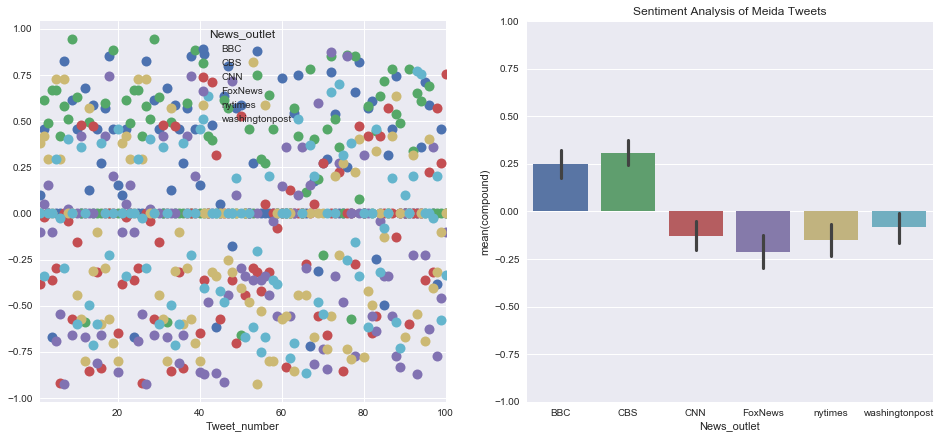

In [109]:
fig, axs = plt.subplots(ncols=2, figsize=(16,7), sharey=False)

compund.plot(marker = 'o', grid=True,style=' ', ms=10, ax=axs[0])
plt.legend(bbox_to_anchor=(1, 1.025))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Meida Tweets')
plt.ylim(-1,1)

sns.barplot(x='News_outlet', y='compound', data=news_outlets_sentements, ax=axs[1])
plt.show();

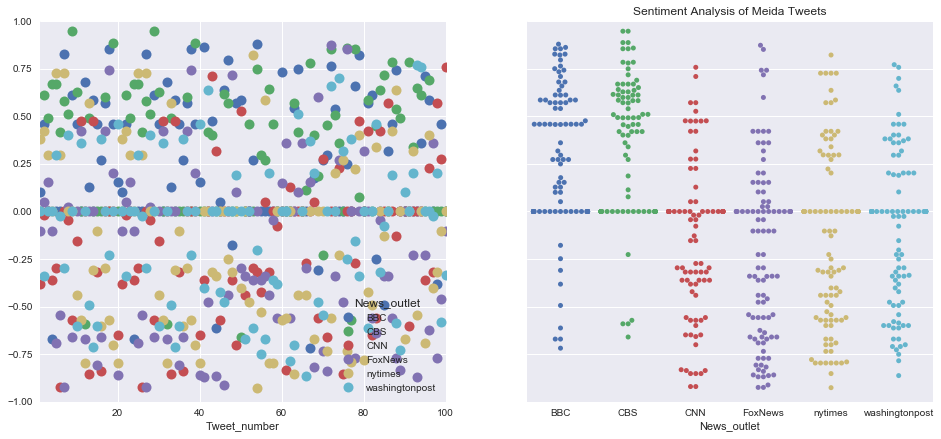

In [110]:
fig, axs = plt.subplots(ncols=2, figsize=(16,7), sharey=True)

compund.plot(marker = 'o', grid=True,style=' ', ms=10, ax=axs[0])
#plt.legend(bbox_to_anchor=(1, 1.025))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Meida Tweets')
plt.ylim(-1,1)

sns.swarmplot(x='News_outlet', y='compound', data=news_outlets_sentements, ax=axs[1])
plt.show()

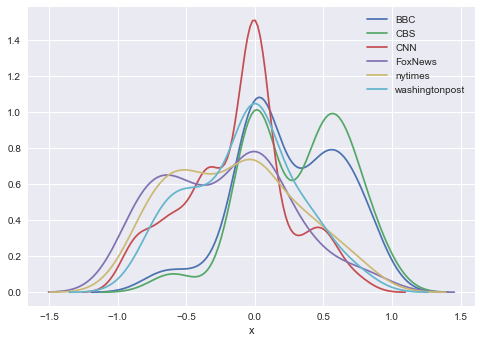

In [111]:
# create a histogram. By default it adds the kde (kernel density estimate)
for i in news_outlets:
    sns.kdeplot(compund[i])
plt.xlabel('x')
plt.show()

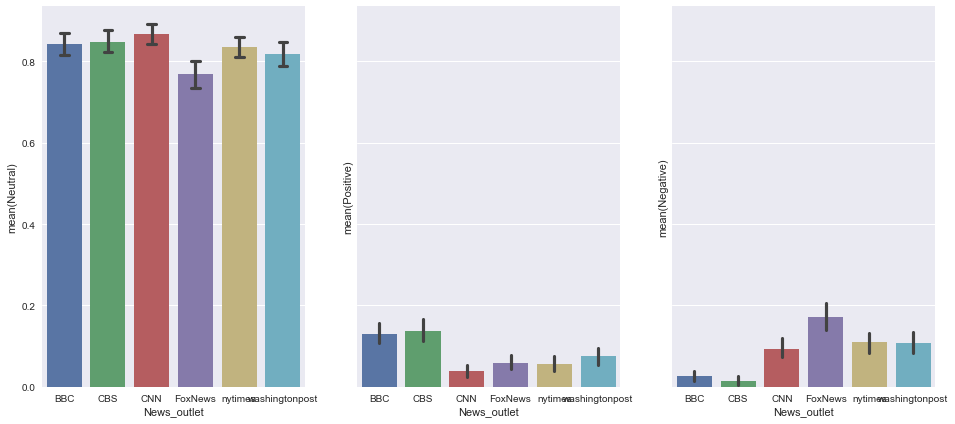

In [112]:
fig, axs = plt.subplots(ncols=3, figsize=(16,7), sharey=True)

sns.barplot(x='News_outlet', y='Neutral', data=news_outlets_sentements, ax=axs[0], capsize=.2)
sns.barplot(x='News_outlet', y='Positive', data=news_outlets_sentements, ax=axs[1])
sns.barplot(x='News_outlet', y='Negative', data=news_outlets_sentements, ax=axs[2])

plt.show()


In [127]:
def plot_time_scores(score):
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 1, 1)

    markers=['bo', 'go', 'ro', 'co', 'mo', 'ko']
    counter=0

    for news_outlet in news_outlets:
        data = news_outlets_sentements[news_outlets_sentements['News_outlet']==news_outlet]
        ax.plot(data.Date_time, data[score], markers[counter], label=news_outlet)
        counter+=1

    ax.legend()
    plt.title(f'Time vs Sentiment score ({score})')
    plt.xlabel('Time')
    plt.show()

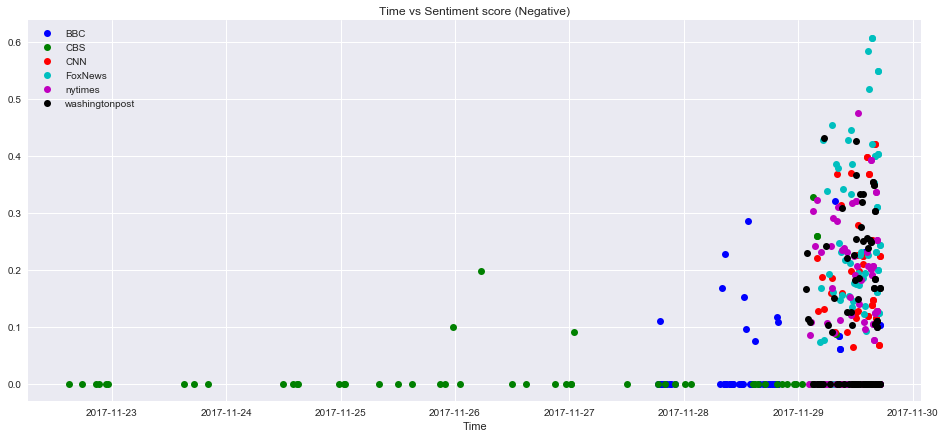

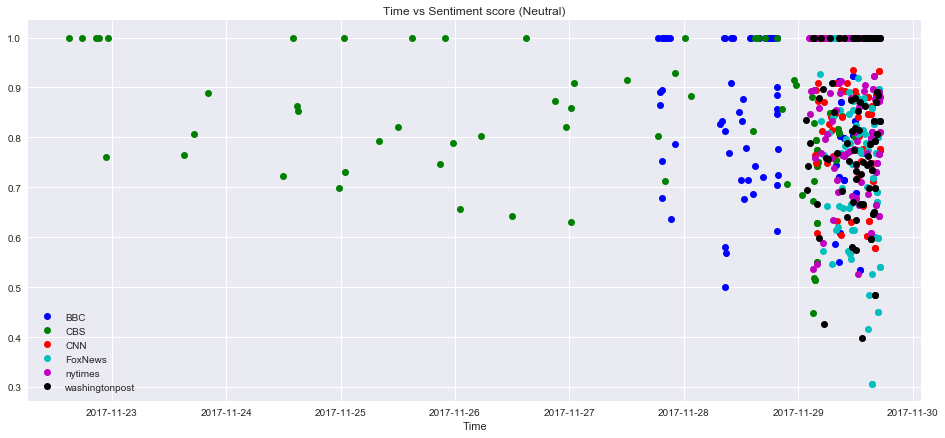

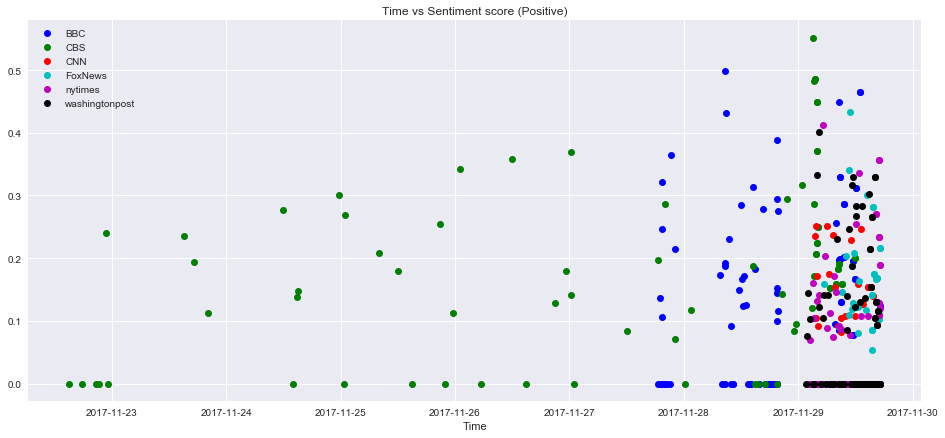

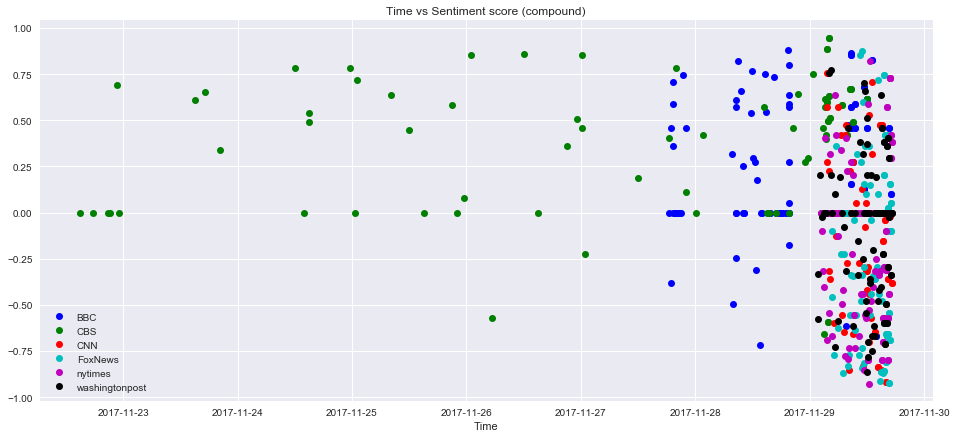

In [128]:
scores=['Negative', 'Neutral', 'Positive', 'compound']
for score in scores:
    plot_time_scores(score)